# Delivery Performance Analysis and Delivery Time Prediction Based on Olist Dataset.

## Latar Belakang:
- Studi McKinsey mendefinisikan e-commerce sebagai **proses jual beli barang fisik secara online** yang dibagi kembali menjadi dua kategori, yaitu:
    - E-tailing, yaitu jual beli formal melalui platform online yang **didesain untuk memfasilitasi transaksi** seperti Bukalapak dan Tokopedia.
    - Social commerce, yaitu **pemasaran barang melalui media sosial** seperti Facebook atau Instagram dengan pembayaran dan pengiriman dilaksanakan melalui platform lain.
- E-commerce juga merupakan industri yang terbukti tahan dalam situasi pandemi belakangan ini.
- Salah satu faktor utama pendukung keberhasilan bisnis e-commerce adalah performa pengiriman barang (Delivery Performance).
- Delivery Performance dapat dimaknai dengan:
    - Ketepatan pengiriman terhadap estimasi waktu  yang diberikan oleh perusahaan e-commerce.
    - Seberapa cepat waktu pengiriman terhadap jarak yang di tempuh antara penjual dan pembeli.
- Berdasarkan data diatas maka penulis ingin melakukan penelitian mengenai **“Delivery Performance Analysis and Delivery Time Prediction Based on Olist Dataset”**.

## Bisnis Problem.
- Berdasarkan Latar Belakang sebelumnya, penulis memiliki beberapa bisnis problem mengenai **Delivery Performance**, yaitu:
    - Faktor apa yang mempengaruhi waktu pengiriman?
    - Faktor apa yang mempengaruhi kecepatan pengiriman?
    - Seberapa tepat delivery performance dari Olist terhadap waktu estimasi pengiriman?
    - Adakah hubungan antara delivery performance terhadap kepuasan pelanggan?
    - Seberapa tepat ML yang dibuat penulis untuk menentukan waktu pengiriman (Delivery Time)?
    
## Dataset
- Dataset yang digunakan merupakan public dataset yang dikeluarkan oleh Olist dari tahun 2016 – 2018.
- Olist merupakan perusahaan asal Brazil yang bergerak di bidang e-commerce melalui marketplace.
- Olist memiliki 9000 lebih tenant dan lebih dari 2 juta pelanggan di seluruh Brazil.
- Sumber dataset yang di gunakan dari Kaggle dengan link: https://www.kaggle.com/olistbr/brazilian-ecommerce
- Dari dataset tersebut memiliki 9 dataset dalam bentuk csv, yang akan digabungkan ke dalam satu dataset dan akan di seleksi fitur apa saja yang dibutuhkan untuk pengerjaan **Delivery Performance Analysis and Delivery Time Prediction Based on Olist Dataset**, dengan penjelasan singkat tiap dataset sebagai berikut:
    - olist_customers_dataset: Dataset ini memberi informasi mengenai *customer* dan lokasinya.
    - olist_geolocation_dataset: Dataset ini memberi informasi mengenai kode pos di negara Brazil, kordinat long/lat, yang dapat digunakan untuk menghitung jarak antara penjual dan *customer*.
    - olist_order_items_dataset: Dataset ini berisi data tentang item yang dibeli masing-masing order.
    - olist_order_payments: Dataset ini berisi data tentang pilihan metode pembayaran.
    - olist_order_reviews_dataset: Dataset ini berisi tentang *review* yang dibuat oleh *customer*.
    - olist_orders_dataset: Dataset ini merupakan dataset utama yang berisi tentangberbagai informasi mengenai *order* (tanggal pembelian, tanggal pengirimnan barang, estimasi sampai barang, tanggal barang sampai di *customer*)
    - olist_products_dataset: Dataset ini berisi data mengenai product yang dijual oleh *Olist*.
    - olist_sellers_dataset: Dataset ini berisi data tentang penjual yang memenuhi pemesanan yang dibuat di *Olist*.
    - product_category_name_traslation: Dataset ini berisi informasi *Product Category Name* dalam bahasa Inggris.

# Importing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno
import matplotlib.pyplot as plt
import datetime

In [2]:
customer = pd.read_csv('olist_customers_dataset.csv')
orderitems = pd.read_csv('olist_order_items_dataset.csv')
orderpayment = pd.read_csv('olist_order_payments_dataset.csv')
orderreview = pd.read_csv('olist_order_reviews_dataset.csv')
order = pd.read_csv('olist_orders_dataset.csv')
product = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')

category = pd.read_csv('product_category_name_translation.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')

# Data Cleaning and Preprocessing

## Data Cleaning

### Checking Data From Every CSV

#### Customer

In [3]:
display(customer.head(2), customer.shape)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


(99441, 5)

In [4]:
customer = customer.drop(['customer_unique_id'], axis=1)

Kolom customer_unique_id di drop karena sebenarnya kita hanya membutuhkan kolom customer_id untuk join dengan dataset lainya

In [5]:
display(customer.head(2), customer.shape)

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP


(99441, 4)

#### Orderitems

In [6]:
display(orderitems.head(2), orderitems.shape)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


(112650, 7)

In [7]:
orderitems[orderitems.duplicated(subset=['order_id', 'product_id', 'seller_id', 'shipping_limit_date',
                                         'price', 'freight_value'])]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
...,...,...,...,...,...,...,...
112617,ffecd5a79a0084f6a592288c67e3c298,3,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


Mengecek data duplicate pada order_item_id karena dari penjelasan kaggle jika pelanggan membeli lebih dari satu barang akan dibentuk series dan meduplikasi order_id dimana jumlah barang sebenarnya ada data paling bawah

In [8]:
orderitems[orderitems['product_id'] == '43423cdffde7fda63d0414ed38c11a73']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
1389,033b0e94801f401cd19503fec4b784d6,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-10-03 22:07:09,55.00,34.19
3172,0721528eb05d8e5bd84d8220c5d4de19,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2018-04-11 23:08:53,87.67,14.40
3663,084eed5f31d7cd5291671a544852e5d4,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-10-04 19:14:11,55.00,21.19
4752,0ab93232e2390bb66ff047c39fd91077,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2018-01-09 04:30:35,59.99,16.86
5071,0b82a32f3caec8e9157049e294486ade,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2018-02-23 16:35:26,54.99,16.82
...,...,...,...,...,...,...,...
111597,fd7b5df31b1135f945600a23960438aa,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2018-04-23 18:51:42,87.67,17.19
112640,fffb9224b6fc7c43ebb0904318b10b5f,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


In [9]:
orderitems = orderitems.drop_duplicates(subset=['order_id', 'product_id', 'seller_id', 'shipping_limit_date',
                                         'price', 'freight_value'], keep= 'last')

Drop dulplicate dari order_item_id dan mengambil nilai terakhir

In [10]:
orderitems[orderitems['product_id'] == '43423cdffde7fda63d0414ed38c11a73']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
1389,033b0e94801f401cd19503fec4b784d6,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-10-03 22:07:09,55.00,34.19
3172,0721528eb05d8e5bd84d8220c5d4de19,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2018-04-11 23:08:53,87.67,14.40
3663,084eed5f31d7cd5291671a544852e5d4,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-10-04 19:14:11,55.00,21.19
4752,0ab93232e2390bb66ff047c39fd91077,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2018-01-09 04:30:35,59.99,16.86
5072,0b82a32f3caec8e9157049e294486ade,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2018-02-23 16:35:26,54.99,16.82
...,...,...,...,...,...,...,...
102838,e98a7233637d3d8e07adcf92b23daaf3,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2018-04-06 13:28:34,54.99,12.44
109858,f9a6aec1708cd20b564a6b2a29ed2290,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-10-03 07:49:07,55.00,7.94
110948,fc118fb67a906addaa99d4d64598038b,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2018-03-28 21:10:34,54.99,12.44
111597,fd7b5df31b1135f945600a23960438aa,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2018-04-23 18:51:42,87.67,17.19


In [11]:
display(orderitems.head(2), orderitems.shape)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


(102425, 7)

#### Orderpayment

In [12]:
display(orderpayment.head(2), orderpayment.shape)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


(103886, 5)

Semua data dari **orderpayment** tidak dipakai

#### Orderreview

In [13]:
display(orderreview.head(2), orderreview.shape)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


(100000, 7)

In [14]:
orderreview = orderreview[['order_id', 'review_score']]

Kolom yang digunakan hanya **order_id** dan **review_score**

In [15]:
display(orderreview.head(2), orderreview.shape)

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5


(100000, 2)

#### Order

In [16]:
display(order.head(2), order.shape)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


(99441, 8)

In [17]:
order['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

Semua kolom akan digunakan

#### Product

In [18]:
display(product.head(2), product.shape)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


(32951, 9)

In [19]:
product = product.drop(['product_name_lenght', 'product_description_lenght', 'product_photos_qty'], axis= 1)

Kolom diatas dirasa tidak diperlukan karena tidak berpengaruh terhadap delivery prediction

In [20]:
display(product.head(2), product.shape)

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0


(32951, 6)

In [21]:
product.describe(include='object').T

,count,unique,top,freq
product_id,32951,32951,444d53deb5d80250e5e44dd416f20298,1
product_category_name,32341,73,cama_mesa_banho,3029


**```[product_weight_g, product_length_cm, product_height_cm, product_width_cm]```** hanya untuk 1 kuantitas barang, jika pemesanan lebih dari satu barang maka dimensi tersebut harus dikalikan dengan jumlah barang

#### Sellers

In [22]:
display(sellers.head(2), sellers.shape)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


(3095, 4)

#### Category

In [23]:
display(category.head(2), category.shape)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


(73, 2)

In [24]:
category.describe(include='object').T

,count,unique,top,freq
product_category_name,73,73,agro_industria_e_comercio,1
product_category_name_english,73,73,fashion_sport,1


In [25]:
product['product_category_name'].nunique()

73

#### Geolocation

In [26]:
display(geolocation.head(2), geolocation.shape)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


(1000163, 5)

In [27]:
pd.DataFrame({'Variables/ Columns' : geolocation.columns, 'dataType' : geolocation.dtypes, 
              'null' : geolocation.isna().sum(), 'unique' : geolocation.nunique(), 
              'uniqueSample' : [list(geolocation[i].drop_duplicates().sample(1))for i in geolocation.columns]}
            ).reset_index(drop = True)

,Variables/ Columns,dataType,null,unique,uniqueSample
0,geolocation_zip_code_prefix,int64,0,19015,[12282]
1,geolocation_lat,float64,0,717358,[-16.405391599626192]
2,geolocation_lng,float64,0,717613,[-49.266118634197]
3,geolocation_city,object,0,8011,[acarape]
4,geolocation_state,object,0,27,[SP]


In [28]:
geolocation = geolocation.iloc[:,:3]

In [29]:
display(geolocation.head(2), geolocation.shape)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1037,-23.545621,-46.639292
1,1046,-23.546081,-46.644820


(1000163, 3)

Hanya kolom diatas yang dibutuhkan untuk pengolahan data jarak berdasarkan longitude dan latitude

In [30]:
geolocation = geolocation.groupby('geolocation_zip_code_prefix',).mean()

In [31]:
display(geolocation.head(2), geolocation.shape)

,geolocation_lat,geolocation_lng
geolocation_zip_code_prefix,,
1001,-23.550190,-46.634024
1002,-23.548146,-46.634979


(19015, 2)

Mengambil nilai rata - rata untuk setiap kolom **geolocation_zip_code_prefix**

### Joining All Data

#### exc. (Category & Geolocation)

In [32]:
maindata = customer.merge(order, on= 'customer_id')
maindata = maindata.merge(orderreview, on = 'order_id')
maindata = maindata.merge(orderitems, on = 'order_id')
maindata = maindata.merge(product, on = 'product_id')
maindata = maindata.merge(sellers, on = 'seller_id')

In [33]:
pd.set_option('display.max_columns', 50)

In [34]:
display(maindata.head(2), maindata.shape)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,4,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
1,8912fc0c3bbf1e2fbf35819e21706718,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,1,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP


(103035, 26)

In [35]:
maindata.isna().sum()

customer_id                         0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1037
order_delivered_customer_date    2251
order_estimated_delivery_date       0
review_score                        0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1469
product_weight_g                   16
product_length_cm                  16
product_height_cm                  16
product_width_cm                   16
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
dtype: int64

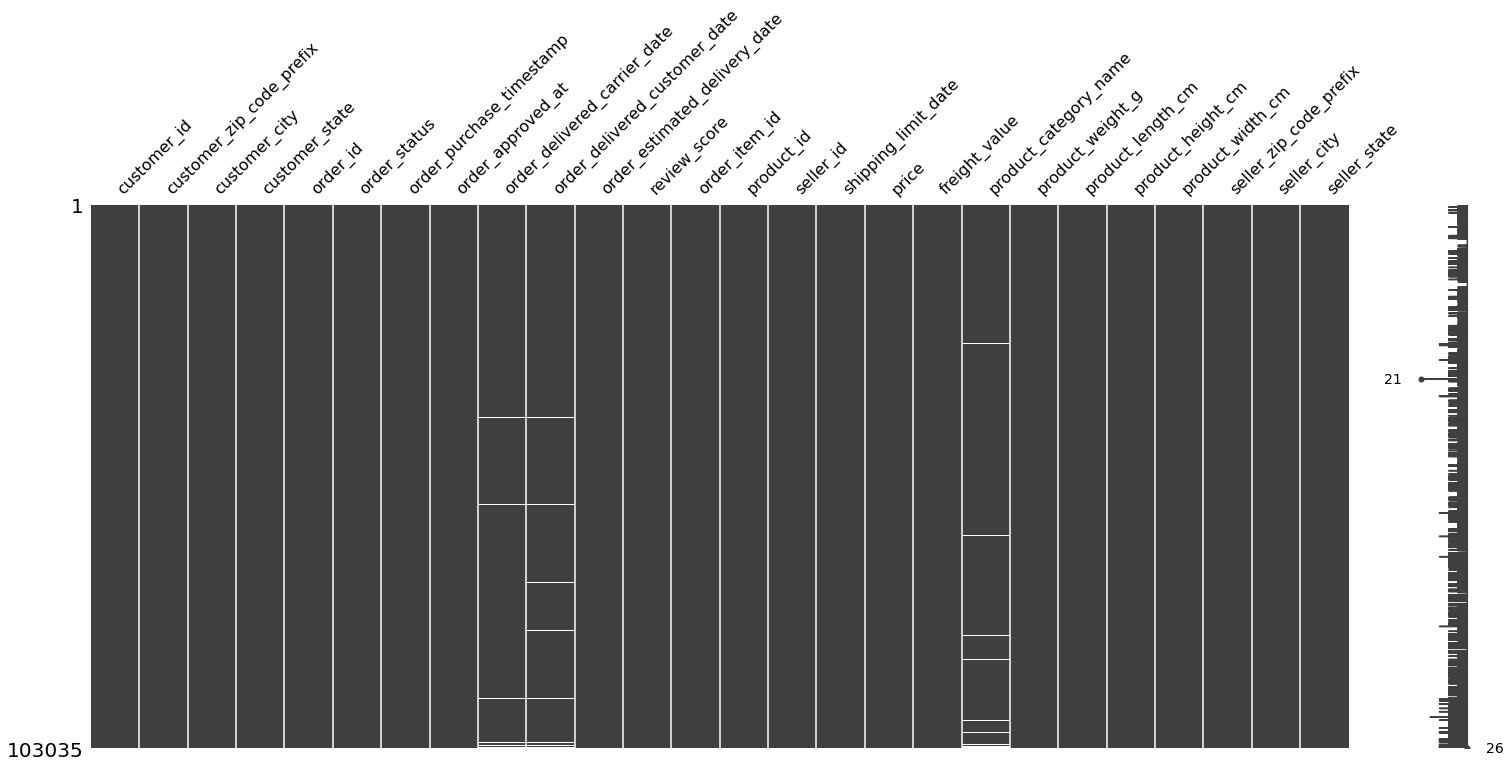

In [36]:
msno.matrix(maindata)
plt.show()

In [37]:
maindata_drop = maindata.dropna()

In [38]:
display(maindata_drop.head(2), maindata_drop.shape)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,4,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
1,8912fc0c3bbf1e2fbf35819e21706718,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,1,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP


(99360, 26)

In [39]:
print(f"Droped Rows: {maindata.shape[0] - maindata_drop.shape[0]}")
print(f"Droped Percentage: {round(((maindata.shape[0] - maindata_drop.shape[0])/maindata.shape[0])*100,2)} %")

Droped Rows: 3675
Droped Percentage: 3.57 %


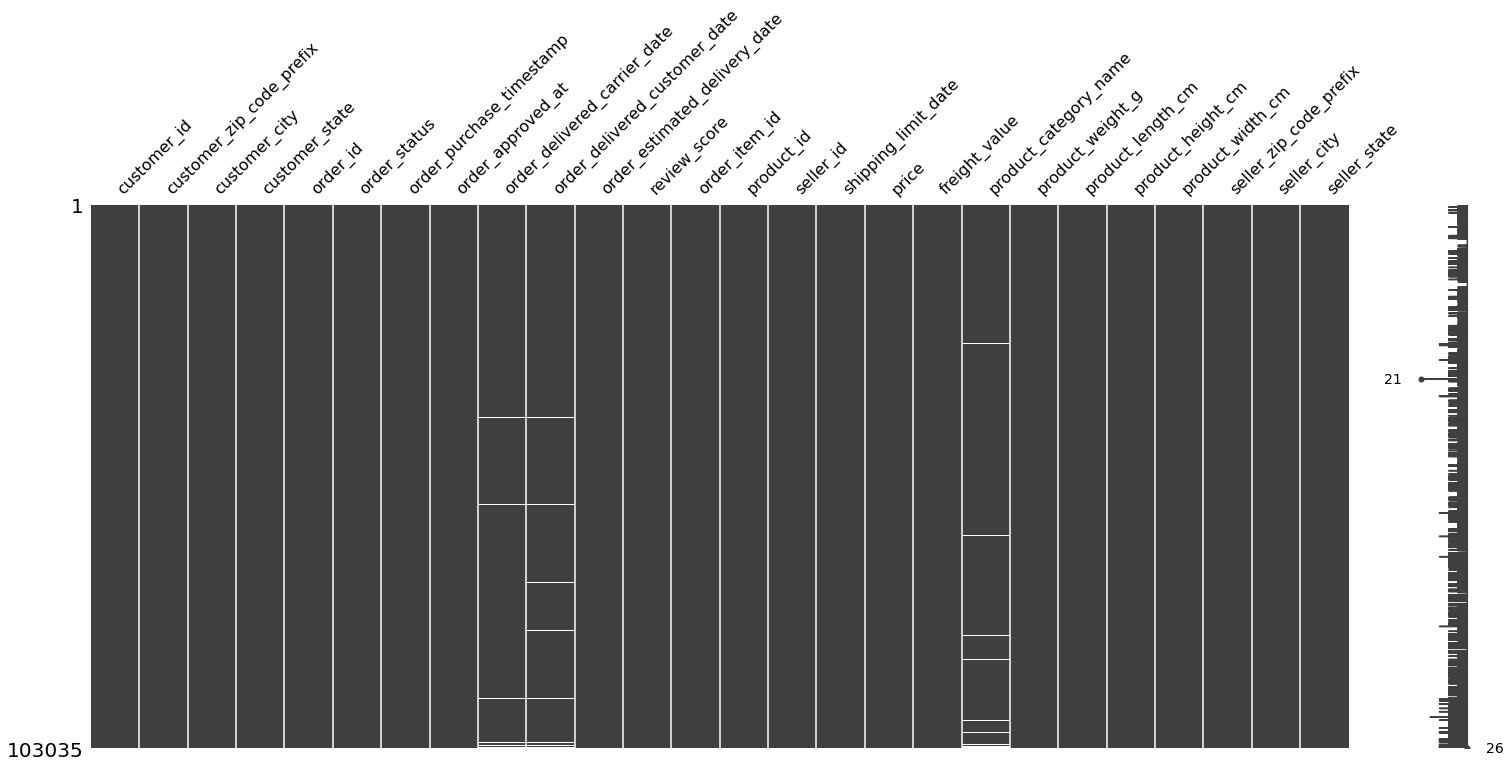

In [40]:
msno.matrix(maindata)
plt.show()

Drop NaN value dilakukan dengan alasan data tersebut merupakan data Missing Completely at Random (MCAR), dan juga data NaN value masih dibawah 10% dari seluruh dataset yang ada.

#### Joining Category

In [41]:
display(maindata_drop[['product_category_name']].head(2), maindata_drop.shape)

,product_category_name
0,moveis_escritorio
1,moveis_escritorio


(99360, 26)

In [42]:
display(category.head(2), category.shape)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


(73, 2)

In [43]:
maindata_drop = maindata_drop.merge(category, on='product_category_name')

In [44]:
display(maindata_drop.head(2), maindata_drop.shape)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,4,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,1,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture


(99360, 27)

In [45]:
maindata_drop.isna().sum()

customer_id                      0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
review_score                     0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
product_category_name_english    0
dtype: int64

#### Joining Geolocation

In [46]:
display(geolocation.head(2), geolocation.shape)

,geolocation_lat,geolocation_lng
geolocation_zip_code_prefix,,
1001,-23.550190,-46.634024
1002,-23.548146,-46.634979


(19015, 2)

In [47]:
seller_zip = geolocation.copy()

In [48]:
seller_zip = seller_zip.reset_index()

In [49]:
seller_zip.columns = ['seller_zip_code_prefix', 'seller_lat', 'seller_lng']

In [50]:
display(seller_zip.head(2), seller_zip.shape)

,seller_zip_code_prefix,seller_lat,seller_lng
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979


(19015, 3)

In [51]:
customer_zip = geolocation.copy()

In [52]:
customer_zip = customer_zip.reset_index()

In [53]:
customer_zip.columns = ['customer_zip_code_prefix', 'customer_lat', 'customer_lng']

In [54]:
display(customer_zip.head(2), customer_zip.shape)

,customer_zip_code_prefix,customer_lat,customer_lng
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979


(19015, 3)

In [55]:
maindata_drop = maindata_drop.merge(seller_zip, on='seller_zip_code_prefix')
maindata_drop = maindata_drop.merge(customer_zip, on='customer_zip_code_prefix')

In [56]:
display(maindata_drop.head(2), maindata_drop.shape)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,4,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture,-23.486111,-46.366721,-20.498489,-47.396929
1,85db3d57353cb12f8ccf1140ea473082,14409,franca,SP,98991dc034323e310fdd97b8af6064b0,delivered,2018-05-08 12:12:30,2018-05-08 12:29:44,2018-05-09 10:13:00,2018-05-14 17:58:16,2018-05-22 00:00:00,5,2,928e52a9ad53a294fdcc91bcf59d1751,955fee9216a65b617aa5c0531780ce60,2018-05-10 12:29:44,130.00,15.00,utilidades_domesticas,1600.0,20.0,60.0,20.0,4782,sao paulo,SP,housewares,-23.691013,-46.703810,-20.498489,-47.396929


(98864, 31)

In [57]:
maindata_drop.isna().sum()

customer_id                      0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
review_score                     0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
product_category_name_english    0
seller_lat                       0
seller_lng          

### Drop Duplicated Data

In [58]:
maindata_drop

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,4,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture,-23.486111,-46.366721,-20.498489,-47.396929
1,85db3d57353cb12f8ccf1140ea473082,14409,franca,SP,98991dc034323e310fdd97b8af6064b0,delivered,2018-05-08 12:12:30,2018-05-08 12:29:44,2018-05-09 10:13:00,2018-05-14 17:58:16,2018-05-22 00:00:00,5,2,928e52a9ad53a294fdcc91bcf59d1751,955fee9216a65b617aa5c0531780ce60,2018-05-10 12:29:44,130.00,15.00,utilidades_domesticas,1600.0,20.0,60.0,20.0,4782,sao paulo,SP,housewares,-23.691013,-46.703810,-20.498489,-47.396929
2,5dca924cc99eea2dc5ba40d11ec5dd0f,14409,franca,SP,95261f608a64bbbe760a212b4d48a4ee,delivered,2018-06-15 20:07:13,2018-06-15 20:41:11,2018-06-18 15:52:00,2018-06-21 12:18:32,2018-07-05 00:00:00,5,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-06-19 20:30:41,79.90,14.87,cama_mesa_banho,1383.0,50.0,10.0,40.0,14940,ibitinga,SP,bed_bath_table,-21.757321,-48.829744,-20.498489,-47.396929
3,48a9965057e1c75ed3a4d511714be18b,14409,franca,SP,dbabdffb9ca50a2b51c3501d849e311b,delivered,2017-06-11 17:20:01,2017-06-11 17:45:15,2017-06-13 09:18:58,2017-06-19 14:42:00,2017-07-03 00:00:00,5,1,fcad6e5643f855de4b616a24e6dd25e4,4a3ca9315b744ce9f8e9374361493884,2017-06-15 17:45:15,286.40,37.51,cama_mesa_banho,15150.0,63.0,30.0,43.0,14940,ibitinga,SP,bed_bath_table,-21.757321,-48.829744,-20.498489,-47.396929
4,3ecddf921de5c14ec1f8bad33216e058,14409,franca,SP,dc7b936d5f26f7506fc2242764d07424,delivered,2017-07-02 00:19:41,2017-07-02 00:30:12,2017-07-04 08:50:59,2017-07-07 18:21:52,2017-07-21 00:00:00,5,1,9e572ff4654f7064419d97a891a8b0fc,da8622b14eb17ae2831f4ac5b9dab84a,2017-07-06 00:30:12,139.90,14.00,cama_mesa_banho,1900.0,47.0,7.0,35.0,13405,piracicaba,SP,bed_bath_table,-22.708702,-47.664701,-20.498489,-47.396929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98859,bb9dfced8ffe5e06c524a73848938b5e,87580,alto piquiri,PR,63ac25fa7a6efd7b94ace6adbb54b431,delivered,2018-01-30 13:29:16,2018-02-01 02:35:37,2018-02-01 19:57:17,2018-02-06 17:57:33,2018-02-21 00:00:00,4,1,11250b0d4b709fee92441c5f34122aed,e59aa562b9f8076dd550fcddf0e73491,2018-02-07 02:35:37,412.00,20.50,agro_industria_e_comercio,3000.0,30.0,30.0,20.0,82810,curitiba,PR,agro_industry_and_commerce,-25.437250,-49.212436,-24.032268,-53.439857
98860,a8331c35b57d8fe09e8df1c06509de29,78655,porto alegre do norte,MT,ee990334acb0ff9333b01afa465f3006,delivered,2018-02-28 17:00:28,2018-03-02 02:10:55,2018-03-02 22:18:35,2018-03-22 10:18:36,2018-04-02 00:00:00,4,1,672e757f331900b9deea127a2a7b79fd,e59aa562b9f8076dd550fcddf0e73491,2018-03-08 02:10:55,410.00,35.32,agro_industria_e_comercio,2650.0,30.0,30.0,20.0,82810,curitiba,PR,agro_industry_and_commerce,-25.437250,-49.212436,-10.872717,-51.636716
98861,1a2c73ee774d8e6701caa7e397236023,25809,tres rios,RJ,fce0844e8548aed6d329fd798f4937a9,delivered,2017-03-10 13:15:23,2017-03-10 13:15:23,2017-03-15 12:27:59,2017-03-21 14:37:45,2017-04-06 00:00:00,5,1,761989673935a5d17b8ea130576beb2a,78ef7e885d17f35e2382a47aae8b8cce,2017-03-16 13:15:23,30.00,17.78,livros_tecnicos,400.0,26.0,2.0,19.0,96816,santa cruz do sul,RS,books_tec

In [59]:
maindata_drop[maindata_drop.duplicated()]

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng
102,1521c5e9bf82979a6b8794e90692097d,37540,santa rita do sapucai,MG,f6089c47bab18faae3d90c64cfb08481,delivered,2017-01-31 16:13:48,2017-01-31 16:25:20,2017-02-02 10:42:44,2017-02-09 15:51:55,2017-03-03 00:00:00,5,1,60525d5b6a1658c5eea3c64713922000,004c9cd9d87a3c30c522c48c4fc07416,2017-02-06 16:13:48,109.99,17.51,cama_mesa_banho,1700.0,30.0,10.0,38.0,14940,ibitinga,SP,bed_bath_table,-21.757321,-48.829744,-22.247211,-45.707521
140,adac4d8a949f5d6da185e384a4140b18,96083,pelotas,RS,b1e45a9d2437f4116c3ff5de92d2a527,delivered,2018-02-09 23:56:01,2018-02-10 00:10:32,2018-02-14 21:38:57,2018-03-12 22:18:31,2018-03-15 00:00:00,5,1,39e3d246a3edd7b9ceba203155c1542c,1835b56ce799e6a4dc4eddc053f04066,2018-02-15 00:10:32,38.50,15.10,cama_mesa_banho,1050.0,16.0,10.0,16.0,14940,ibitinga,SP,bed_bath_table,-21.757321,-48.829744,-31.758884,-52.272005
566,15f7712bb12fe27068e5353d14503653,22210,rio de janeiro,RJ,5e4c365dd3cf7769a88981f408d069d3,delivered,2017-11-21 21:31:09,2017-11-23 02:47:29,2017-11-28 23:33:04,2017-12-23 16:13:34,2017-12-12 00:00:00,1,1,0d86ff0b639e969a11a7b3dce67e181c,3b15288545f8928d3e65a8f949a28291,2017-12-01 02:47:29,89.99,17.88,cama_mesa_banho,1850.0,40.0,5.0,30.0,14940,ibitinga,SP,bed_bath_table,-21.757321,-48.829744,-22.931071,-43.176116
982,c348c931c27b95c6f37d635ddcd65a84,22745,rio de janeiro,RJ,c63031aab37b1beb849bb4856afd4f13,delivered,2017-05-24 08:26:11,2017-05-26 02:42:36,2017-05-26 13:15:09,2017-06-01 15:44:01,2017-06-19 00:00:00,5,1,83b6f73c0ad25d9b469deacf8da19d80,6560211a19b47992c3666cc44a7e94c0,2017-06-02 02:42:36,39.00,14.10,relogios_presentes,200.0,16.0,2.0,11.0,5849,sao paulo,SP,watches_gifts,-23.652366,-46.755753,-22.935058,-43.333594
1254,cef7f153f7fb65e2076d6f15e7f58f55,11702,praia grande,SP,f494e4f6b6de7aeefe3af00acc8b3426,delivered,2017-06-09 19:13:10,2017-06-09 19:22:11,2017-06-16 19:59:43,2017-06-23 09:45:45,2017-06-30 00:00:00,5,1,1aa2ed670a95e9f475723707a7c3f386,a3e9a2c700480d9bb01fba070ba80a0e,2017-06-15 19:22:11,40.00,13.37,cama_mesa_banho,1000.0,38.0,6.0,29.0,14940,ibitinga,SP,bed_bath_table,-21.757321,-48.829744,-24.014395,-46.438358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95484,ee3462376b2201e5a972bcf476c08479,66115,belem,PA,25cb912c6742e486c6988aaf2c8f221b,delivered,2018-02-18 07:40:25,2018-02-18 08:40:25,2018-02-21 21:38:57,2018-03-23 17:16:56,2018-03-26 00:00:00,5,2,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2018-02-27 08:30:55,56.99,17.68,perfumaria,250.0,20.0,8.0,21.0,9015,santo andre,SP,perfumery,-23.659364,-46.523183,-1.398354,-48.485855
97386,a85e16c60e3462ec7eaec32f98745da6,96045,pelotas,RS,10467788e05701fc7e9293f6cbed5c11,delivered,2017-08-21 09:23:23,2017-08-21 09:35:28,2017-08-22 13:37:02,2017-09-11 20:13:40,2017-09-15 00:00:00,5,1,ce7e83b77ac0130534e014f2b334574f,855668e0971d4dfd7bef1b6a4133b41b,2017-08-25 09:35:28,25.00,52.95,bebes,13050.0,65.0,30.0,40.0,13257,itatiba,SP,baby,-22.988257,-46.853963,-31.748135,-52.390928
98211,27f334c3f646310457b7ab3135cd87c9,70645,brasilia,DF,ffaabba06c9d293a3c614e0515ddbabc,delivered,2017-11-23 14:43:38,2017-11-25 03:51:54,2017-11-28 22:08:24,2017-12-19 16:19:01,2017-12-21 00:00:00,3,1,8634ba98d69440265e955814c3e4cde1,05ff92fedb5be47920fea08e501238b9,2017-11-30 03:51:54,119.00,34.63,cool_stuff,400.0,17.0,9.0,12.0,98803,santo angelo,RS,cool_stuff,-28.290553,-54.262511,-15.781852,-47.934055
98213,78dade93bc51c691586fc4880c

In [60]:
maindata_drop = maindata_drop.drop_duplicates(keep='last')

In [61]:
maindata_drop[maindata_drop.duplicated()]

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng


In [62]:
display(maindata_drop.head(2), maindata_drop.shape)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,4,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture,-23.486111,-46.366721,-20.498489,-47.396929
1,85db3d57353cb12f8ccf1140ea473082,14409,franca,SP,98991dc034323e310fdd97b8af6064b0,delivered,2018-05-08 12:12:30,2018-05-08 12:29:44,2018-05-09 10:13:00,2018-05-14 17:58:16,2018-05-22 00:00:00,5,2,928e52a9ad53a294fdcc91bcf59d1751,955fee9216a65b617aa5c0531780ce60,2018-05-10 12:29:44,130.00,15.00,utilidades_domesticas,1600.0,20.0,60.0,20.0,4782,sao paulo,SP,housewares,-23.691013,-46.703810,-20.498489,-47.396929


(98506, 31)

In [63]:
print(f"Droped Rows: {maindata.shape[0] - maindata_drop.shape[0]}")
print(f"Droped Percentage: {round(((maindata.shape[0] - maindata_drop.shape[0])/maindata.shape[0])*100,2)}%")

Droped Rows: 4529
Droped Percentage: 4.4%


## Data Preprocessing

### Selecting Delivered Order Status

Karena project ini bertujuan untuk menentukan prediksi tanggal sampai barang (delivery time), maka data yang digunakan hanya data dengan order_status = delivered

In [64]:
maindata_drop = maindata_drop[maindata_drop['order_status'] == 'delivered']

In [65]:
display(maindata_drop.head(2), maindata_drop.shape)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,4,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture,-23.486111,-46.366721,-20.498489,-47.396929
1,85db3d57353cb12f8ccf1140ea473082,14409,franca,SP,98991dc034323e310fdd97b8af6064b0,delivered,2018-05-08 12:12:30,2018-05-08 12:29:44,2018-05-09 10:13:00,2018-05-14 17:58:16,2018-05-22 00:00:00,5,2,928e52a9ad53a294fdcc91bcf59d1751,955fee9216a65b617aa5c0531780ce60,2018-05-10 12:29:44,130.00,15.00,utilidades_domesticas,1600.0,20.0,60.0,20.0,4782,sao paulo,SP,housewares,-23.691013,-46.703810,-20.498489,-47.396929


(98499, 31)

### Calculating Distance

Calculating distance dilakukan untuk menentukan jarak antara seller denga customer seberapa jauh dalam (Km)

In [66]:
def distance_km(lat1,lon1,lat2,lon2):
    R = 6373.0  # approximate radius of earth in km
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

In [67]:
# Tester
print(f' Jarak: {round(distance_km(52.2296756,21.0122287,52.406374,16.9251681), 2)} Km')

 Jarak: 278.55 Km


In [68]:
maindata_drop['distance (Km)'] = distance_km(maindata_drop['seller_lat'], maindata_drop['seller_lng'],
                                             maindata_drop['customer_lat'],maindata_drop['customer_lng'])

In [69]:
display(maindata_drop.head(2), maindata_drop.shape)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng,distance (Km)
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,4,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture,-23.486111,-46.366721,-20.498489,-47.396929,348.880143
1,85db3d57353cb12f8ccf1140ea473082,14409,franca,SP,98991dc034323e310fdd97b8af6064b0,delivered,2018-05-08 12:12:30,2018-05-08 12:29:44,2018-05-09 10:13:00,2018-05-14 17:58:16,2018-05-22 00:00:00,5,2,928e52a9ad53a294fdcc91bcf59d1751,955fee9216a65b617aa5c0531780ce60,2018-05-10 12:29:44,130.00,15.00,utilidades_domesticas,1600.0,20.0,60.0,20.0,4782,sao paulo,SP,housewares,-23.691013,-46.703810,-20.498489,-47.396929,362.214896


(98499, 32)

In [70]:
maindata_drop.isna().sum()

customer_id                      0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
review_score                     0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
product_category_name_english    0
seller_lat                       0
seller_lng          

In [71]:
maindata_drop[maindata_drop.duplicated()]

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng,distance (Km)


In [72]:
maindata_drop['distance (Km)'].describe()

count    98499.000000
mean       600.216879
std        591.871636
min          0.000000
25%        189.352791
50%        434.417054
75%        797.467852
max       8680.635813
Name: distance (Km), dtype: float64

In [73]:
display(maindata_drop[maindata_drop['distance (Km)'] == 0].head(2), maindata_drop[maindata_drop['distance (Km)'] == 0].shape)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng,distance (Km)
1584,8a98da413a02121d98fb2bba846b5d89,90010,porto alegre,RS,ab8b1138bd32dba20890d59a736b53d2,delivered,2017-03-17 12:33:22,2017-03-17 12:33:22,2017-03-20 09:41:50,2017-03-22 14:42:20,2017-04-05 00:00:00,3,1,4abef02c9dfc89006cb3d501d1f291c1,d98eec89afa3380e14463da2aabaea72,2017-03-23 12:33:22,50.00,8.72,bebes,250.0,16.0,6.0,13.0,90010,porto alegre,RS,baby,-30.033213,-51.231438,-30.033213,-51.231438,0.0
2578,d8690d5619753ee8295c1a1f602d9fc0,22240,rio de janeiro,RJ,42a64eac09d0a6be5a307753093d45e8,delivered,2017-10-25 08:53:51,2017-10-25 09:06:11,2017-10-25 17:02:45,2017-10-26 19:05:14,2017-11-07 00:00:00,5,1,e2c3ed9aaddfd2312a6a5fe9b3ddadd3,46dc3b2cc0980fb8ec44634e21d2718e,2017-10-31 09:06:11,99.99,12.15,brinquedos,675.0,22.0,24.0,21.0,22240,rio de janeiro,RJ,toys,-22.935263,-43.187264,-22.935263,-43.187264,0.0


(23, 32)

Dikarenakan kolom distance tidak boleh kosong karena akan mempengaruhi feature kecepatan pengiriman yaitu (lama pengiriman/km).

In [74]:
maindata_drop[maindata_drop['distance (Km)'] > 0].sort_values(by=['distance (Km)'])

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng,distance (Km)
65486,78b2c378bfab658007bb6c5ae2b09829,3507,sao paulo,SP,7c8582fc7ce51a091fe83cb5efa4e84e,delivered,2018-01-12 14:57:31,2018-01-13 14:52:30,2018-01-15 17:24:46,2018-01-17 22:23:33,2018-01-31 00:00:00,5,1,0736b2e56f06e14d3aa1bef54de26052,92eb0f42c21942b6552362b9b114707d,2018-01-18 14:52:30,13.88,7.78,telefonia,75.0,19.0,3.0,11.0,3504,sao paulo,SP,telephony,-23.537555,-46.538228,-23.537839,-46.538625,0.051334
35816,3b6184d3b25641ce87e09c1f4233b84e,30170,belo horizonte,MG,ca1be30219791e22648cca249a8681f2,delivered,2018-01-05 11:18:10,2018-01-10 13:29:11,2018-01-11 01:27:44,2018-01-12 21:09:45,2018-01-23 00:00:00,4,1,cac9e5692471a0700418aa3400b9b2b1,7ea5bfa6c340f58f8e71fc1f0412b0d6,2018-01-16 13:29:11,124.99,9.44,bebes,375.0,29.0,14.0,20.0,30180,belo horizonte,MG,baby,-19.926410,-43.945864,-19.927104,-43.944964,0.121795
71015,c5cb6707ec7496b205b38c522ca44bcf,2724,sao paulo,SP,aaee808634adf6a6f4bdd2354f43f448,delivered,2018-06-05 09:21:25,2018-06-05 09:35:14,2018-06-08 14:04:00,2018-06-09 19:47:37,2018-07-27 00:00:00,5,2,0c79aab7a6a2449f932887fb3c8d0127,70b52a4cfc823994561b00bad161b4ed,2018-07-04 09:35:14,58.50,7.39,automotivo,250.0,18.0,9.0,14.0,2727,sao paulo,SP,auto,-23.496829,-46.685783,-23.497651,-46.681732,0.423243
18200,14899a7f295c6833b50bc7950eb054dd,4776,sao paulo,SP,aef85868b291058edac07999dfc93307,delivered,2017-11-17 19:40:58,2017-11-17 20:31:47,2017-11-22 20:58:40,2017-11-23 20:28:00,2017-12-01 00:00:00,5,1,bdb4be6ce2f7f2b5be0a16088028c7fc,955fee9216a65b617aa5c0531780ce60,2017-11-24 20:30:47,85.00,14.20,utilidades_domesticas,3100.0,45.0,28.0,26.0,4782,sao paulo,SP,housewares,-23.691013,-46.703810,-23.687008,-46.702403,0.468013
18199,1a676431a620077bb8729856a39ac786,4776,sao paulo,SP,f48002abf6b605f05930183c385a0394,delivered,2017-12-14 16:53:48,2017-12-14 17:12:58,2017-12-18 18:35:20,2017-12-19 16:56:42,2018-01-04 00:00:00,5,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2017-12-21 17:12:58,75.00,13.08,moveis_decoracao,2600.0,50.0,10.0,30.0,4782,sao paulo,SP,furniture_decor,-23.691013,-46.703810,-23.687008,-46.702403,0.468013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95025,6203febf07756d9424976ade260a21d9,29654,santo antonio do canaa,ES,4f1583d080fe1eec5e509335d79b17c6,delivered,2018-07-11 14:55:56,2018-07-11 15:06:23,2018-07-16 09:15:00,2018-08-02 00:28:50,2018-07-31 00:00:00,5,1,677863732107706b878df62cdc8eaf8e,ff1fb4c404b2efe68b03350a8dc24122,2018-07-16 15:06:23,160.00,34.88,brinquedos,6617.0,46.0,33.0,35.0,8710,mogi das cruzes,SP,toys,-23.522840,-46.195546,2.854530,-70.315200,3928.638928
94763,2dd769df72fbd8448297d18c48df7b92,46560,ibiajara,BA,897ec6416d50126a9061626f0fc2d658,delivered,2017-04-20 15:05:38,2017-04-20 15:21:31,2017-04-24 07:52:21,2017-05-18 08:06:47,2017-05-22 00:00:00,1,1,1d54b96972338247c7341a2069e2bd96,6560211a19b47992c3666cc44a7e94c0,2017-04-27 15:21:31,45.00,20.80,relogios_presentes,150.0,16.0,2.0,20.0,5849,sao paulo,SP,watches_gifts,-23.652366,-46.755753,13.001420,-23.583939,4793.118466
98520,816fa7cf00e01aaf19c7ad215b049c9b,68275,porto trombetas,PA,acdbc7396e191931c263db11af241d62,delivered,2017-11-05 19:54:45,2017-11-07 07:30:48,2017-11-08 16:22:45,2017-12-04 21:04:22,2017-12-14 00:00:00,5,1,9545d45c37449ccbc376de3a04c66e71,431af27f296bc6519d890aa5a05fdb11,2017-11-13 04:32:06,121.90,29.25,beleza_saude,1350.0,27.0,9.0,18.0,14110,ribeirao preto,SP,health

Kolom jarak = 0 dimaknai karena zip code seller dan zip code customer berada pada lokasi sama, maka dapat di asumikan dengan antara customer dan seller tetap ada jarak walaupun dengan nilai yang sangat kecil, maka dari data diatas jarak terdekat antar zip code adalah 0.05 km, maka untuk zip code yang sama diambil dari jarak terdekat antar zip code/2, yaitu 0.025.

In [75]:
maindata_drop = maindata_drop.replace({'distance (Km)': {0: 0.025}})

In [76]:
display(maindata_drop[maindata_drop['distance (Km)'] == 0.025].head(2), 
        maindata_drop[maindata_drop['distance (Km)'] == 0.025].shape)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng,distance (Km)
1584,8a98da413a02121d98fb2bba846b5d89,90010,porto alegre,RS,ab8b1138bd32dba20890d59a736b53d2,delivered,2017-03-17 12:33:22,2017-03-17 12:33:22,2017-03-20 09:41:50,2017-03-22 14:42:20,2017-04-05 00:00:00,3,1,4abef02c9dfc89006cb3d501d1f291c1,d98eec89afa3380e14463da2aabaea72,2017-03-23 12:33:22,50.00,8.72,bebes,250.0,16.0,6.0,13.0,90010,porto alegre,RS,baby,-30.033213,-51.231438,-30.033213,-51.231438,0.025
2578,d8690d5619753ee8295c1a1f602d9fc0,22240,rio de janeiro,RJ,42a64eac09d0a6be5a307753093d45e8,delivered,2017-10-25 08:53:51,2017-10-25 09:06:11,2017-10-25 17:02:45,2017-10-26 19:05:14,2017-11-07 00:00:00,5,1,e2c3ed9aaddfd2312a6a5fe9b3ddadd3,46dc3b2cc0980fb8ec44634e21d2718e,2017-10-31 09:06:11,99.99,12.15,brinquedos,675.0,22.0,24.0,21.0,22240,rio de janeiro,RJ,toys,-22.935263,-43.187264,-22.935263,-43.187264,0.025


(23, 32)

In [77]:
maindata_drop['distance (Km)'].describe()

count    98499.000000
mean       600.216884
std        591.871630
min          0.025000
25%        189.352791
50%        434.417054
75%        797.467852
max       8680.635813
Name: distance (Km), dtype: float64

### Delivery Time (Days)

Kolom Delivery Time : Kolom berapa hari barang akan sampai setelah order di terima sampai barang tersebut sampai ke customer.

In [78]:
maindata_drop['delivery_time (days)'] = (pd.to_datetime(maindata_drop['order_delivered_customer_date']) 
                                           - pd.to_datetime(maindata_drop['order_approved_at'])).dt.days

In [79]:
display(maindata_drop.head(2), maindata_drop.shape)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng,distance (Km),delivery_time (days)
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,4,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture,-23.486111,-46.366721,-20.498489,-47.396929,348.880143,8
1,85db3d57353cb12f8ccf1140ea473082,14409,franca,SP,98991dc034323e310fdd97b8af6064b0,delivered,2018-05-08 12:12:30,2018-05-08 12:29:44,2018-05-09 10:13:00,2018-05-14 17:58:16,2018-05-22 00:00:00,5,2,928e52a9ad53a294fdcc91bcf59d1751,955fee9216a65b617aa5c0531780ce60,2018-05-10 12:29:44,130.00,15.00,utilidades_domesticas,1600.0,20.0,60.0,20.0,4782,sao paulo,SP,housewares,-23.691013,-46.703810,-20.498489,-47.396929,362.214896,6


(98499, 33)

In [80]:
maindata_drop['delivery_time (days)'].describe()

count    98499.000000
mean        11.571681
std          9.497487
min         -7.000000
25%          6.000000
50%          9.000000
75%         15.000000
max        208.000000
Name: delivery_time (days), dtype: float64

In [81]:
display(maindata_drop[maindata_drop['delivery_time (days)'] <= 0].head(2), maindata_drop[maindata_drop['delivery_time (days)'] <= 0].shape)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng,distance (Km),delivery_time (days)
400,2e1a3155fdbee565b7ad55cb75ce8f78,6414,barueri,SP,6df6c9c9af6ef75b4f06f8a7b9f47e9c,delivered,2018-07-23 08:50:48,2018-07-28 23:31:06,2018-07-24 14:47:00,2018-07-26 17:03:43,2018-07-31 00:00:00,5,1,e8a1dffbef0392ef084cca41655a13d1,411f3b52d857390502ee4e4d5ceabc2d,2018-07-26 04:25:19,19.80,8.30,construcao_ferramentas_construcao,500.0,30.0,30.0,30.0,9400,ribeirao pires,SP,construction_tools_construction,-23.711851,-46.412441,-23.493552,-46.871704,52.733097,-3
486,65691ce6d0d99e673bd133ade0ec2362,26070,nova iguacu,RJ,8883dd20e652369652c1abd7a411788f,delivered,2018-08-14 14:24:51,2018-08-20 14:36:32,2018-08-17 14:44:00,2018-08-20 17:37:56,2018-08-23 00:00:00,5,1,ddea12cd17c60cff8865c207cf696cf7,056b4ada5bbc2c50cc7842547dda6b51,2018-08-17 14:45:31,199.99,9.31,relogios_presentes,425.0,18.0,8.0,12.0,26379,queimados,RJ,watches_gifts,-22.737015,-43.563619,-22.712262,-43.433978,13.582519,0


(230, 33)

In [82]:
maindata_drop = maindata_drop[maindata_drop['delivery_time (days)'] > 0]

In [83]:
display(maindata_drop.head(2), maindata_drop.shape)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng,distance (Km),delivery_time (days)
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,4,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture,-23.486111,-46.366721,-20.498489,-47.396929,348.880143,8
1,85db3d57353cb12f8ccf1140ea473082,14409,franca,SP,98991dc034323e310fdd97b8af6064b0,delivered,2018-05-08 12:12:30,2018-05-08 12:29:44,2018-05-09 10:13:00,2018-05-14 17:58:16,2018-05-22 00:00:00,5,2,928e52a9ad53a294fdcc91bcf59d1751,955fee9216a65b617aa5c0531780ce60,2018-05-10 12:29:44,130.00,15.00,utilidades_domesticas,1600.0,20.0,60.0,20.0,4782,sao paulo,SP,housewares,-23.691013,-46.703810,-20.498489,-47.396929,362.214896,6


(98269, 33)

In [84]:
maindata_drop['delivery_time (days)'].describe()

count    98269.000000
mean        11.600311
std          9.489874
min          1.000000
25%          6.000000
50%          9.000000
75%         15.000000
max        208.000000
Name: delivery_time (days), dtype: float64

### Delivery Time/Distance

Kolom Deliveri Time/Distance: Adalah kolom dimana kecepatan pengiriman (hari)/ dengan jarak (km).

In [85]:
maindata_drop['delivery_time/distance'] = maindata_drop['delivery_time (days)']/maindata_drop['distance (Km)']

In [86]:
display(maindata_drop.head(2), maindata_drop.shape)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng,distance (Km),delivery_time (days),delivery_time/distance
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,4,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture,-23.486111,-46.366721,-20.498489,-47.396929,348.880143,8,0.022931
1,85db3d57353cb12f8ccf1140ea473082,14409,franca,SP,98991dc034323e310fdd97b8af6064b0,delivered,2018-05-08 12:12:30,2018-05-08 12:29:44,2018-05-09 10:13:00,2018-05-14 17:58:16,2018-05-22 00:00:00,5,2,928e52a9ad53a294fdcc91bcf59d1751,955fee9216a65b617aa5c0531780ce60,2018-05-10 12:29:44,130.00,15.00,utilidades_domesticas,1600.0,20.0,60.0,20.0,4782,sao paulo,SP,housewares,-23.691013,-46.703810,-20.498489,-47.396929,362.214896,6,0.016565


(98269, 34)

In [87]:
maindata_drop['delivery_time/distance'].describe()

count    98269.000000
mean         0.114743
std          3.128524
min          0.000424
25%          0.012774
50%          0.022606
75%          0.047201
max        560.000000
Name: delivery_time/distance, dtype: float64

In [88]:
display(maindata_drop[maindata_drop['delivery_time/distance'] <= 0].head(2), maindata_drop[maindata_drop['delivery_time/distance'] <= 0].shape)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng,distance (Km),delivery_time (days),delivery_time/distance


(0, 34)

In [89]:
maindata_drop = maindata_drop[maindata_drop['delivery_time/distance'] > 0]

In [90]:
display(maindata_drop.head(2), maindata_drop.shape)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng,distance (Km),delivery_time (days),delivery_time/distance
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,4,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture,-23.486111,-46.366721,-20.498489,-47.396929,348.880143,8,0.022931
1,85db3d57353cb12f8ccf1140ea473082,14409,franca,SP,98991dc034323e310fdd97b8af6064b0,delivered,2018-05-08 12:12:30,2018-05-08 12:29:44,2018-05-09 10:13:00,2018-05-14 17:58:16,2018-05-22 00:00:00,5,2,928e52a9ad53a294fdcc91bcf59d1751,955fee9216a65b617aa5c0531780ce60,2018-05-10 12:29:44,130.00,15.00,utilidades_domesticas,1600.0,20.0,60.0,20.0,4782,sao paulo,SP,housewares,-23.691013,-46.703810,-20.498489,-47.396929,362.214896,6,0.016565


(98269, 34)

In [91]:
maindata_drop['delivery_time/distance'].describe()

count    98269.000000
mean         0.114743
std          3.128524
min          0.000424
25%          0.012774
50%          0.022606
75%          0.047201
max        560.000000
Name: delivery_time/distance, dtype: float64

### Delivery Performance (Days)

Kolom Delivery Performance (Days) : Adalah kolom selisih hari antara estimasi barang itu sampai ke customer (hari) dengan tanggal asli kapan barang tersebut sampai ke customer (actual), dalam satuan hari.

In [92]:
maindata_drop['delivery_performance (days)'] = (pd.to_datetime(maindata_drop['order_estimated_delivery_date']) 
                                           - pd.to_datetime(maindata_drop['order_delivered_customer_date'])).dt.days

In [93]:
display(maindata_drop.head(2), maindata_drop.shape)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng,distance (Km),delivery_time (days),delivery_time/distance,delivery_performance (days)
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,4,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture,-23.486111,-46.366721,-20.498489,-47.396929,348.880143,8,0.022931,10
1,85db3d57353cb12f8ccf1140ea473082,14409,franca,SP,98991dc034323e310fdd97b8af6064b0,delivered,2018-05-08 12:12:30,2018-05-08 12:29:44,2018-05-09 10:13:00,2018-05-14 17:58:16,2018-05-22 00:00:00,5,2,928e52a9ad53a294fdcc91bcf59d1751,955fee9216a65b617aa5c0531780ce60,2018-05-10 12:29:44,130.00,15.00,utilidades_domesticas,1600.0,20.0,60.0,20.0,4782,sao paulo,SP,housewares,-23.691013,-46.703810,-20.498489,-47.396929,362.214896,6,0.016565,7


(98269, 35)

In [94]:
maindata_drop['delivery_performance (days)'].describe()

count    98269.00000
mean        10.99307
std         10.21949
min       -189.00000
25%          6.00000
50%         12.00000
75%         16.00000
max        146.00000
Name: delivery_performance (days), dtype: float64

### Volume

Kolom Volume adalah: Kolom dimensi dari barang tersebut. (panjang x tinggi x lebar) per satu barang.

In [95]:
maindata_drop['volume_cm3'] = maindata_drop['product_length_cm'] * maindata_drop['product_height_cm'] * maindata_drop['product_width_cm']

In [96]:
display(maindata_drop.head(2), maindata_drop.shape)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng,distance (Km),delivery_time (days),delivery_time/distance,delivery_performance (days),volume_cm3
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,4,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture,-23.486111,-46.366721,-20.498489,-47.396929,348.880143,8,0.022931,10,107136.0
1,85db3d57353cb12f8ccf1140ea473082,14409,franca,SP,98991dc034323e310fdd97b8af6064b0,delivered,2018-05-08 12:12:30,2018-05-08 12:29:44,2018-05-09 10:13:00,2018-05-14 17:58:16,2018-05-22 00:00:00,5,2,928e52a9ad53a294fdcc91bcf59d1751,955fee9216a65b617aa5c0531780ce60,2018-05-10 12:29:44,130.00,15.00,utilidades_domesticas,1600.0,20.0,60.0,20.0,4782,sao paulo,SP,housewares,-23.691013,-46.703810,-20.498489,-47.396929,362.214896,6,0.016565,7,24000.0


(98269, 36)

In [97]:
maindata_drop['volume_cm3'].describe()

count     98269.000000
mean      15161.526229
std       23287.515027
min         168.000000
25%        2816.000000
50%        6400.000000
75%       18368.000000
max      296208.000000
Name: volume_cm3, dtype: float64

In [98]:
maindata_drop['order_id'].nunique()

94434

### Total Volume

Kolom Total volume adalah : Volume x Jumlah barang

In [99]:
maindata_drop['total_volume_cm3'] = maindata_drop['volume_cm3'] * maindata_drop['order_item_id']

In [100]:
display(maindata_drop.head(2), maindata_drop.shape)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng,distance (Km),delivery_time (days),delivery_time/distance,delivery_performance (days),volume_cm3,total_volume_cm3
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,4,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture,-23.486111,-46.366721,-20.498489,-47.396929,348.880143,8,0.022931,10,107136.0,107136.0
1,85db3d57353cb12f8ccf1140ea473082,14409,franca,SP,98991dc034323e310fdd97b8af6064b0,delivered,2018-05-08 12:12:30,2018-05-08 12:29:44,2018-05-09 10:13:00,2018-05-14 17:58:16,2018-05-22 00:00:00,5,2,928e52a9ad53a294fdcc91bcf59d1751,955fee9216a65b617aa5c0531780ce60,2018-05-10 12:29:44,130.00,15.00,utilidades_domesticas,1600.0,20.0,60.0,20.0,4782,sao paulo,SP,housewares,-23.691013,-46.703810,-20.498489,-47.396929,362.214896,6,0.016565,7,24000.0,48000.0


(98269, 37)

In [101]:
maindata_drop['total_volume_cm3'].describe()

count    9.826900e+04
mean     1.749894e+04
std      3.152912e+04
min      1.680000e+02
25%      2.964000e+03
50%      7.350000e+03
75%      1.986600e+04
max      1.512000e+06
Name: total_volume_cm3, dtype: float64

### Total Order Item Value

Kolom Total Order Item Value : Harga x jumlah barang.

In [102]:
maindata_drop['total_order_item_value'] = maindata_drop['order_item_id'] * maindata_drop['price']

In [103]:
display(maindata_drop.head(2), maindata_drop.shape)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng,distance (Km),delivery_time (days),delivery_time/distance,delivery_performance (days),volume_cm3,total_volume_cm3,total_order_item_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,4,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture,-23.486111,-46.366721,-20.498489,-47.396929,348.880143,8,0.022931,10,107136.0,107136.0,124.99
1,85db3d57353cb12f8ccf1140ea473082,14409,franca,SP,98991dc034323e310fdd97b8af6064b0,delivered,2018-05-08 12:12:30,2018-05-08 12:29:44,2018-05-09 10:13:00,2018-05-14 17:58:16,2018-05-22 00:00:00,5,2,928e52a9ad53a294fdcc91bcf59d1751,955fee9216a65b617aa5c0531780ce60,2018-05-10 12:29:44,130.00,15.00,utilidades_domesticas,1600.0,20.0,60.0,20.0,4782,sao paulo,SP,housewares,-23.691013,-46.703810,-20.498489,-47.396929,362.214896,6,0.016565,7,24000.0,48000.0,260.00


(98269, 38)

In [104]:
maindata_drop['total_order_item_value'].describe()

count    98269.000000
mean       136.285325
std        208.094110
min          0.850000
25%         45.900000
50%         85.000000
75%        149.900000
max      13440.000000
Name: total_order_item_value, dtype: float64

### Total Freight Value

Kolom Total Freight Value: Harga pengiriman x jumlah barang.

In [105]:
maindata_drop['total_freight_value'] = maindata_drop['order_item_id'] * maindata_drop['freight_value']

In [106]:
display(maindata_drop.head(2), maindata_drop.shape)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng,distance (Km),delivery_time (days),delivery_time/distance,delivery_performance (days),volume_cm3,total_volume_cm3,total_order_item_value,total_freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,4,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture,-23.486111,-46.366721,-20.498489,-47.396929,348.880143,8,0.022931,10,107136.0,107136.0,124.99,21.88
1,85db3d57353cb12f8ccf1140ea473082,14409,franca,SP,98991dc034323e310fdd97b8af6064b0,delivered,2018-05-08 12:12:30,2018-05-08 12:29:44,2018-05-09 10:13:00,2018-05-14 17:58:16,2018-05-22 00:00:00,5,2,928e52a9ad53a294fdcc91bcf59d1751,955fee9216a65b617aa5c0531780ce60,2018-05-10 12:29:44,130.00,15.00,utilidades_domesticas,1600.0,20.0,60.0,20.0,4782,sao paulo,SP,housewares,-23.691013,-46.703810,-20.498489,-47.396929,362.214896,6,0.016565,7,24000.0,48000.0,260.00,30.00


(98269, 39)

In [107]:
maindata_drop['total_freight_value'].describe()

count    98269.000000
mean        22.901252
std         22.717364
min          0.000000
25%         13.720000
50%         17.150000
75%         24.000000
max       1794.960000
Name: total_freight_value, dtype: float64

In [108]:
maindata_drop[maindata_drop['freight_value'] == 0].sort_values(by=['order_item_id'], ascending= False)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng,distance (Km),delivery_time (days),delivery_time/distance,delivery_performance (days),volume_cm3,total_volume_cm3,total_order_item_value,total_freight_value
79696,5352d7b0e81c3b107191e70df710c5c5,25212,duque de caxias,RJ,84f89b4f4b956843277c6b990bd06b2f,delivered,2018-04-24 23:25:11,2018-04-24 23:35:09,2018-04-30 06:18:00,2018-05-05 17:31:33,2018-05-24 00:00:00,4,5,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-01 23:35:09,99.9,0.0,relogios_presentes,584.0,16.0,11.0,13.0,14050,ribeirao preto,SP,watches_gifts,-21.172861,-47.823700,-22.676474,-43.257020,499.978475,10,0.020001,18,2288.0,11440.0,499.5,0.0
38488,4bee7310eb7a2e6ff35cef3c2b3e0f5f,33600,pedro leopoldo,MG,d7c88b34559c799b7170fb42a1222ab7,delivered,2018-05-02 09:25:17,2018-05-03 04:32:49,2018-05-04 15:46:00,2018-05-10 13:13:11,2018-05-28 00:00:00,5,4,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 04:30:36,53.9,0.0,ferramentas_jardim,1550.0,30.0,22.0,30.0,15025,sao jose do rio preto,SP,garden_tools,-20.806707,-49.389165,-19.613118,-44.039892,573.895663,7,0.012197,17,19800.0,79200.0,215.6,0.0
83862,c490bef02137db10e5a2d0095bee13bb,42806,camacari,BA,b5f13aa3a46ca3005d39389331866fe4,delivered,2018-05-06 21:38:02,2018-05-08 19:34:47,2018-05-10 18:29:00,2018-06-01 17:48:46,2018-06-04 00:00:00,3,3,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-14 19:31:38,99.9,0.0,relogios_presentes,584.0,16.0,11.0,13.0,14050,ribeirao preto,SP,watches_gifts,-21.172861,-47.823700,-12.703257,-38.333687,1380.067413,23,0.016666,2,2288.0,6864.0,299.7,0.0
52906,44d64cac6b7087a085f02d3895df8028,23060,rio de janeiro,RJ,2a0fa6741aab1f723a7eeaaf58fda1e4,delivered,2018-04-25 20:05:21,2018-04-25 20:31:26,2018-04-26 15:01:00,2018-05-15 20:41:23,2018-06-05 00:00:00,1,3,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-02 20:31:13,53.9,0.0,ferramentas_jardim,1550.0,30.0,22.0,30.0,15025,sao jose do rio preto,SP,garden_tools,-20.806707,-49.389165,-22.896090,-43.598897,641.285411,20,0.031187,20,19800.0,59400.0,161.7,0.0
32584,8f0d2d201106ce6885ab7b72beb9073e,21511,rio de janeiro,RJ,4296bf3920be4eaa22d4f0cd0c3467b9,delivered,2018-05-08 07:20:00,2018-05-08 20:55:00,2018-05-10 18:29:00,2018-05-18 17:18:34,2018-06-12 00:00:00,1,3,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-14 20:55:00,99.9,0.0,relogios_presentes,584.0,16.0,11.0,13.0,14050,ribeirao preto,SP,watches_gifts,-21.172861,-47.823700,-22.844103,-43.352193,497.142765,9,0.018103,24,2288.0,6864.0,299.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20669,5e67c2816f006a8ef69b3e9c8a5fab8f,76180,nazario,GO,04105b54650921ca3246f52e6f175f46,delivered,2018-04-23 09:07:38,2018-04-24 17:13:18,2018-04-24 22:08:40,2018-05-10 00:36:31,2018-05-22 00:00:00,5,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-04-27 09:31:35,69.9,0.0,moveis_decoracao,2600.0,50.0,10.0,30.0,4782,sao paulo,SP,furniture_decor,-23.691013,-46.703810,-16.580899,-49.882921,857.598727,15,0.017491,11,15000.0,15000.0,69.9,0.0
20628,82246fa860dbc4d1e81654bb922253de,20771,rio de janeiro,RJ,7de1ba35d9d0422c7129096639f316c9,delivered,2018-05-19 19:46:33,2018-05-19 19:56:57,2018-05-21 13:06:00,2018-06-06 17:46:56,2018-06-20 00:00:00,5,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-05-22 19:56:

In [109]:
display(orderpayment[orderpayment['order_id']  == '84f89b4f4b956843277c6b990bd06b2f'][['payment_value']])
display(maindata_drop[maindata_drop['order_id'] == '84f89b4f4b956843277c6b990bd06b2f'][['order_item_id', 'freight_value', 'price']])

,payment_value
17713,499.5


,order_item_id,freight_value,price
79696,5,0.0,99.9


In [110]:
maindata_drop =maindata_drop[maindata_drop['freight_value'] > 0]

Freight value = 0 diasumsikan data tersebut adalah data harga promosi/salah input, maka akan di drop untuk menjaga korelasi data yang lainya.

In [111]:
display(maindata_drop.head(2), maindata_drop.shape)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng,distance (Km),delivery_time (days),delivery_time/distance,delivery_performance (days),volume_cm3,total_volume_cm3,total_order_item_value,total_freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,4,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture,-23.486111,-46.366721,-20.498489,-47.396929,348.880143,8,0.022931,10,107136.0,107136.0,124.99,21.88
1,85db3d57353cb12f8ccf1140ea473082,14409,franca,SP,98991dc034323e310fdd97b8af6064b0,delivered,2018-05-08 12:12:30,2018-05-08 12:29:44,2018-05-09 10:13:00,2018-05-14 17:58:16,2018-05-22 00:00:00,5,2,928e52a9ad53a294fdcc91bcf59d1751,955fee9216a65b617aa5c0531780ce60,2018-05-10 12:29:44,130.00,15.00,utilidades_domesticas,1600.0,20.0,60.0,20.0,4782,sao paulo,SP,housewares,-23.691013,-46.703810,-20.498489,-47.396929,362.214896,6,0.016565,7,24000.0,48000.0,260.00,30.00


(97935, 39)

In [112]:
maindata_drop['total_freight_value'].describe()

count    97935.000000
mean        22.979355
std         22.716601
min          0.010000
25%         13.770000
50%         17.180000
75%         24.060000
max       1794.960000
Name: total_freight_value, dtype: float64

### Total Payment Value

Total Payment value : total harga barang ['total_order_item_value'] + total harga pengiriman ['total_freight_value']

In [113]:
maindata_drop['total_payment_value'] = maindata_drop['total_order_item_value'] + maindata_drop['total_freight_value']

In [114]:
display(maindata_drop.head(2), maindata_drop.shape)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng,distance (Km),delivery_time (days),delivery_time/distance,delivery_performance (days),volume_cm3,total_volume_cm3,total_order_item_value,total_freight_value,total_payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,4,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture,-23.486111,-46.366721,-20.498489,-47.396929,348.880143,8,0.022931,10,107136.0,107136.0,124.99,21.88,146.87
1,85db3d57353cb12f8ccf1140ea473082,14409,franca,SP,98991dc034323e310fdd97b8af6064b0,delivered,2018-05-08 12:12:30,2018-05-08 12:29:44,2018-05-09 10:13:00,2018-05-14 17:58:16,2018-05-22 00:00:00,5,2,928e52a9ad53a294fdcc91bcf59d1751,955fee9216a65b617aa5c0531780ce60,2018-05-10 12:29:44,130.00,15.00,utilidades_domesticas,1600.0,20.0,60.0,20.0,4782,sao paulo,SP,housewares,-23.691013,-46.703810,-20.498489,-47.396929,362.214896,6,0.016565,7,24000.0,48000.0,260.00,30.00,290.00


(97935, 40)

In [115]:
maindata_drop['total_payment_value'].describe()

count    97935.000000
mean       159.349130
std        218.453693
min          7.280000
25%         61.670000
50%        104.370000
75%        176.160000
max      13664.080000
Name: total_payment_value, dtype: float64

In [116]:
maindata_drop[maindata_drop['total_payment_value'] == 7.280000]

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng,distance (Km),delivery_time (days),delivery_time/distance,delivery_performance (days),volume_cm3,total_volume_cm3,total_order_item_value,total_freight_value,total_payment_value
93297,0b6c2ee27dbe0bcbffd424f2ddedd222,2731,sao paulo,SP,71e22e2d99081d6dc07d9627bb85969e,delivered,2018-01-24 22:46:55,2018-01-24 22:56:25,2018-01-25 15:32:52,2018-01-29 16:58:48,2018-02-19 00:00:00,2,1,ac480ada5f06d9024eae2c6dd9de4c74,4e06067cc08b3f41d837768d392c3ee3,2018-01-30 22:56:25,7.0,0.28,perfumaria,200.0,20.0,7.0,20.0,32604,betim,MG,perfumery,-19.951799,-44.196037,-23.498059,-46.692424,471.270809,4,0.008488,20,2800.0,2800.0,7.0,0.28,7.28


In [117]:
maindata_drop[maindata_drop['total_payment_value'] == 13664.080000]

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng,distance (Km),delivery_time (days),delivery_time/distance,delivery_performance (days),volume_cm3,total_volume_cm3,total_order_item_value,total_freight_value,total_payment_value
58495,1617b1357756262bfa56ab541c47bc16,20080,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,1,8,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,telefonia_fixa,750.0,16.0,16.0,16.0,3667,sao paulo,SP,fixed_telephony,-23.531307,-46.494795,-22.901209,-43.184957,345.5139,15,0.043414,5,4096.0,32768.0,13440.0,224.08,13664.08


### Seller Delivery Performance (Days)

Seller Delivery Performance : batas waktu penjual untuk mengirim barang ke jasa ekspedisi ['shipping_limit_date'] - waktu asli si penjual mengirim barang ke ekspedisi ['order_delivered_carrier_date']

In [118]:
maindata_drop['seller_delivery_performance (days)'] = (pd.to_datetime(maindata_drop['shipping_limit_date']) 
                                           - pd.to_datetime(maindata_drop['order_delivered_carrier_date'])).dt.days

In [119]:
display(maindata_drop.head(2), maindata_drop.shape)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng,distance (Km),delivery_time (days),delivery_time/distance,delivery_performance (days),volume_cm3,total_volume_cm3,total_order_item_value,total_freight_value,total_payment_value,seller_delivery_performance (days)
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,4,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture,-23.486111,-46.366721,-20.498489,-47.396929,348.880143,8,0.022931,10,107136.0,107136.0,124.99,21.88,146.87,-1
1,85db3d57353cb12f8ccf1140ea473082,14409,franca,SP,98991dc034323e310fdd97b8af6064b0,delivered,2018-05-08 12:12:30,2018-05-08 12:29:44,2018-05-09 10:13:00,2018-05-14 17:58:16,2018-05-22 00:00:00,5,2,928e52a9ad53a294fdcc91bcf59d1751,955fee9216a65b617aa5c0531780ce60,2018-05-10 12:29:44,130.00,15.00,utilidades_domesticas,1600.0,20.0,60.0,20.0,4782,sao paulo,SP,housewares,-23.691013,-46.703810,-20.498489,-47.396929,362.214896,6,0.016565,7,24000.0,48000.0,260.00,30.00,290.00,1


(97935, 41)

In [120]:
maindata_drop['seller_delivery_performance (days)'].describe()

count    97935.000000
mean         2.851932
std          5.010313
min        -96.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1046.000000
Name: seller_delivery_performance (days), dtype: float64

### Shipping Time (Days)

Shipping Time days: Waktu pengiriman barang dari jasa ekspedisi ke costumer (tanggal actual barang sampai ke customer ['order_delivered_customer_date'] - waktu asli si penjual mengirim barang ke ekspedisi ['order_delivered_carrier_date'])

In [121]:
maindata_drop['shipping_time_(days)'] = (pd.to_datetime(maindata_drop['order_delivered_customer_date']) 
                                           - pd.to_datetime(maindata_drop['order_delivered_carrier_date'])).dt.days

In [122]:
display(maindata_drop.head(2), maindata_drop.shape)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng,distance (Km),delivery_time (days),delivery_time/distance,delivery_performance (days),volume_cm3,total_volume_cm3,total_order_item_value,total_freight_value,total_payment_value,seller_delivery_performance (days),shipping_time_(days)
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,4,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture,-23.486111,-46.366721,-20.498489,-47.396929,348.880143,8,0.022931,10,107136.0,107136.0,124.99,21.88,146.87,-1,1
1,85db3d57353cb12f8ccf1140ea473082,14409,franca,SP,98991dc034323e310fdd97b8af6064b0,delivered,2018-05-08 12:12:30,2018-05-08 12:29:44,2018-05-09 10:13:00,2018-05-14 17:58:16,2018-05-22 00:00:00,5,2,928e52a9ad53a294fdcc91bcf59d1751,955fee9216a65b617aa5c0531780ce60,2018-05-10 12:29:44,130.00,15.00,utilidades_domesticas,1600.0,20.0,60.0,20.0,4782,sao paulo,SP,housewares,-23.691013,-46.703810,-20.498489,-47.396929,362.214896,6,0.016565,7,24000.0,48000.0,260.00,30.00,290.00,1,5


(97935, 42)

In [123]:
maindata_drop['shipping_time_(days)'].describe()

count    97935.000000
mean         8.832695
std          8.740164
min        -17.000000
25%          4.000000
50%          7.000000
75%         11.000000
max        205.000000
Name: shipping_time_(days), dtype: float64

In [124]:
len(maindata_drop[maindata_drop['shipping_time_(days)'] < 0])

42

In [125]:
maindata_drop = maindata_drop[maindata_drop['shipping_time_(days)'] >= 0]

In [126]:
display(maindata_drop.head(2), maindata_drop.shape)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng,distance (Km),delivery_time (days),delivery_time/distance,delivery_performance (days),volume_cm3,total_volume_cm3,total_order_item_value,total_freight_value,total_payment_value,seller_delivery_performance (days),shipping_time_(days)
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,4,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture,-23.486111,-46.366721,-20.498489,-47.396929,348.880143,8,0.022931,10,107136.0,107136.0,124.99,21.88,146.87,-1,1
1,85db3d57353cb12f8ccf1140ea473082,14409,franca,SP,98991dc034323e310fdd97b8af6064b0,delivered,2018-05-08 12:12:30,2018-05-08 12:29:44,2018-05-09 10:13:00,2018-05-14 17:58:16,2018-05-22 00:00:00,5,2,928e52a9ad53a294fdcc91bcf59d1751,955fee9216a65b617aa5c0531780ce60,2018-05-10 12:29:44,130.00,15.00,utilidades_domesticas,1600.0,20.0,60.0,20.0,4782,sao paulo,SP,housewares,-23.691013,-46.703810,-20.498489,-47.396929,362.214896,6,0.016565,7,24000.0,48000.0,260.00,30.00,290.00,1,5


(97893, 42)

### Checking Duplicate Value

In [127]:
display(maindata_drop.head(2), maindata_drop.shape)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng,distance (Km),delivery_time (days),delivery_time/distance,delivery_performance (days),volume_cm3,total_volume_cm3,total_order_item_value,total_freight_value,total_payment_value,seller_delivery_performance (days),shipping_time_(days)
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,4,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture,-23.486111,-46.366721,-20.498489,-47.396929,348.880143,8,0.022931,10,107136.0,107136.0,124.99,21.88,146.87,-1,1
1,85db3d57353cb12f8ccf1140ea473082,14409,franca,SP,98991dc034323e310fdd97b8af6064b0,delivered,2018-05-08 12:12:30,2018-05-08 12:29:44,2018-05-09 10:13:00,2018-05-14 17:58:16,2018-05-22 00:00:00,5,2,928e52a9ad53a294fdcc91bcf59d1751,955fee9216a65b617aa5c0531780ce60,2018-05-10 12:29:44,130.00,15.00,utilidades_domesticas,1600.0,20.0,60.0,20.0,4782,sao paulo,SP,housewares,-23.691013,-46.703810,-20.498489,-47.396929,362.214896,6,0.016565,7,24000.0,48000.0,260.00,30.00,290.00,1,5


(97893, 42)

In [128]:
maindata_drop[maindata_drop.duplicated()]

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng,distance (Km),delivery_time (days),delivery_time/distance,delivery_performance (days),volume_cm3,total_volume_cm3,total_order_item_value,total_freight_value,total_payment_value,seller_delivery_performance (days),shipping_time_(days)


In [129]:
maindata_drop['customer_id'].nunique()

94078

In [130]:
print(f"Droped Rows: {maindata.shape[0] - maindata_drop.shape[0]}")
print(f"Droped Percentage: {round(((maindata.shape[0] - maindata_drop.shape[0])/maindata.shape[0])*100,2)}%")

Droped Rows: 5142
Droped Percentage: 4.99%


## Saving DF to CSV

In [131]:
display(maindata_drop.head(2), maindata_drop.shape)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng,distance (Km),delivery_time (days),delivery_time/distance,delivery_performance (days),volume_cm3,total_volume_cm3,total_order_item_value,total_freight_value,total_payment_value,seller_delivery_performance (days),shipping_time_(days)
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,4,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture,-23.486111,-46.366721,-20.498489,-47.396929,348.880143,8,0.022931,10,107136.0,107136.0,124.99,21.88,146.87,-1,1
1,85db3d57353cb12f8ccf1140ea473082,14409,franca,SP,98991dc034323e310fdd97b8af6064b0,delivered,2018-05-08 12:12:30,2018-05-08 12:29:44,2018-05-09 10:13:00,2018-05-14 17:58:16,2018-05-22 00:00:00,5,2,928e52a9ad53a294fdcc91bcf59d1751,955fee9216a65b617aa5c0531780ce60,2018-05-10 12:29:44,130.00,15.00,utilidades_domesticas,1600.0,20.0,60.0,20.0,4782,sao paulo,SP,housewares,-23.691013,-46.703810,-20.498489,-47.396929,362.214896,6,0.016565,7,24000.0,48000.0,260.00,30.00,290.00,1,5


(97893, 42)

In [132]:
maindata_drop.columns

Index(['customer_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_score', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name_english', 'seller_lat', 'seller_lng',
       'customer_lat', 'customer_lng', 'distance (Km)', 'delivery_time (days)',
       'delivery_time/distance', 'delivery_performance (days)', 'volume_cm3',
       'total_volume_cm3', 'total_order_item_value', 'total_freight_value',
       'total_payment_value', 'seller_delivery_performance (days)',
       'shipping_time_(days)'],
      dty

Mengatur urutan kolom agar data lebih mudah untuk dilihat.

In [133]:
maindata_drop = maindata_drop[['customer_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'customer_lat',
                               'customer_lng', 'seller_id',  'seller_zip_code_prefix', 'seller_city',  'seller_state',
                               'seller_lat', 'seller_lng', 'distance (Km)', 'order_id', 'order_status', 'review_score', 
                               'order_item_id', 'order_purchase_timestamp', 'order_approved_at', 'shipping_limit_date',
                               'order_delivered_carrier_date', 'order_estimated_delivery_date',
                               'order_delivered_customer_date', 'product_id', 'product_category_name_english', 'price',
                               'total_order_item_value', 'product_weight_g', 'product_length_cm',  'product_height_cm',
                               'product_width_cm', 'volume_cm3', 'total_volume_cm3',  'freight_value', 'total_freight_value',
                               'total_payment_value', 'seller_delivery_performance (days)', 'delivery_performance (days)',
                               'shipping_time_(days)', 'delivery_time (days)', 'delivery_time/distance']]

Feature **'product_category_name'** tidak dimasukan karena sudah ada feature **'product_category_name_english'**

In [134]:
display(maindata_drop.head(2), maindata_drop.shape)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,distance (Km),order_id,order_status,review_score,order_item_id,order_purchase_timestamp,order_approved_at,shipping_limit_date,order_delivered_carrier_date,order_estimated_delivery_date,order_delivered_customer_date,product_id,product_category_name_english,price,total_order_item_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume_cm3,total_volume_cm3,freight_value,total_freight_value,total_payment_value,seller_delivery_performance (days),delivery_performance (days),shipping_time_(days),delivery_time (days),delivery_time/distance
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,-20.498489,-47.396929,7c67e1448b00f6e969d365cea6b010ab,8577,itaquaquecetuba,SP,-23.486111,-46.366721,348.880143,00e7ee1b050b8499577073aeb2a297a1,delivered,4,1,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-22 15:22:12,2017-05-23 10:47:57,2017-06-05 00:00:00,2017-05-25 10:35:35,a9516a079e37a9c9c36b9b78b10169e8,office_furniture,124.99,124.99,8683.0,54.0,64.0,31.0,107136.0,107136.0,21.88,21.88,146.87,-1,10,1,8,0.022931
1,85db3d57353cb12f8ccf1140ea473082,14409,franca,SP,-20.498489,-47.396929,955fee9216a65b617aa5c0531780ce60,4782,sao paulo,SP,-23.691013,-46.703810,362.214896,98991dc034323e310fdd97b8af6064b0,delivered,5,2,2018-05-08 12:12:30,2018-05-08 12:29:44,2018-05-10 12:29:44,2018-05-09 10:13:00,2018-05-22 00:00:00,2018-05-14 17:58:16,928e52a9ad53a294fdcc91bcf59d1751,housewares,130.00,260.00,1600.0,20.0,60.0,20.0,24000.0,48000.0,15.00,30.00,290.00,1,7,5,6,0.016565


(97893, 41)

Mengganti nama kolom agar lebih mudah di pelajari.

In [135]:
maindata_drop = maindata_drop.rename(columns={'customer_zip_code_prefix': 'customer_zip_code', 'seller_zip_code_prefix': 'seller_zip_code',
                             'order_item_id':'quantity', 'total_order_item_value':'total_price', 'total_payment_value' : 'total_payment',
                                             'order_delivered_customer_date':'actual_delivered_date'})

In [137]:
maindata_drop.to_csv('brazilian_ecommerce_after_cleaning.csv', index= False)

In [139]:
df = pd.read_csv('brazilian_ecommerce_after_cleaning.csv')
df.head(2)

,customer_id,customer_zip_code,customer_city,customer_state,customer_lat,customer_lng,seller_id,seller_zip_code,seller_city,seller_state,seller_lat,seller_lng,distance (Km),order_id,order_status,review_score,quantity,order_purchase_timestamp,order_approved_at,shipping_limit_date,order_delivered_carrier_date,order_estimated_delivery_date,actual_delivered_date,product_id,product_category_name_english,price,total_price,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume_cm3,total_volume_cm3,freight_value,total_freight_value,total_payment,seller_delivery_performance (days),delivery_performance (days),shipping_time_(days),delivery_time (days),delivery_time/distance
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,-20.498489,-47.396929,7c67e1448b00f6e969d365cea6b010ab,8577,itaquaquecetuba,SP,-23.486111,-46.366721,348.880143,00e7ee1b050b8499577073aeb2a297a1,delivered,4,1,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-22 15:22:12,2017-05-23 10:47:57,2017-06-05 00:00:00,2017-05-25 10:35:35,a9516a079e37a9c9c36b9b78b10169e8,office_furniture,124.99,124.99,8683.0,54.0,64.0,31.0,107136.0,107136.0,21.88,21.88,146.87,-1,10,1,8,0.022931
1,85db3d57353cb12f8ccf1140ea473082,14409,franca,SP,-20.498489,-47.396929,955fee9216a65b617aa5c0531780ce60,4782,sao paulo,SP,-23.691013,-46.703810,362.214896,98991dc034323e310fdd97b8af6064b0,delivered,5,2,2018-05-08 12:12:30,2018-05-08 12:29:44,2018-05-10 12:29:44,2018-05-09 10:13:00,2018-05-22 00:00:00,2018-05-14 17:58:16,928e52a9ad53a294fdcc91bcf59d1751,housewares,130.00,260.00,1600.0,20.0,60.0,20.0,24000.0,48000.0,15.00,30.00,290.00,1,7,5,6,0.016565
